### Sales Analysis

Exploratory Data Analysis (EDA)
Process of analysing and summarizing data in order to gain insights and understanding of the underlying patterns and relationships.

EDA involves the following steps:
    - Data cleaning: Involves removing or correcting any errors or inconsistencies in the data, such as missing values or incorrect values.
        
    - Data Visualization- Data visualization techniques are then used to graphically represent the data and identify any trends or patterns.
    
    - Statistical Analysis- Is used to identify any relationships between variables and to test hypotheses about data. This may involve calculating summary statistics such as mean and standard deviation, and performing tests such as correlation analysis and hypothesis testing.
    


In [1]:
#pip install missingno

In [2]:
# Import libraries
import pandas as pd #Data preprocessing
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization
import missingno as msno #Missing Data- #Data visualization
from collections import Counter #Counting

In [3]:
# Load the dataset (using pandas)

df = pd.read_csv(r"C:\Users\EZ FARMING\Desktop\Seun Personal Docs\DATA SCIENCE\PYTHON\EXPLORATIVE DATA ANALYSIS\DUNE SALES CASE STUDY\Dune Sales Data.csv")
# OR df = pd.read_csv("C:\\Users\\EZ FARMING\\Desktop\\Seun Personal Docs\\DATA SCIENCE\\PYTHON\\EXPLORATIVE DATA ANALYSIS\\Dune Sales Data.csv")

In [4]:
# Print the top rows
df.head() #Top 5 rows (by default. You can do more than 5 rows by specifying e.g df.head(10))

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0  19-Feb-16     High        Segun            29               F  Abia   
1  20-Feb-16     High        Segun            29               F  Abia   
2  27-Feb-16     High        Segun            29               F  Abia   
3  12-Mar-16     High        Segun            29               F  Abia   
4  12-Mar-16     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  
0      109.00  
1       28.50  
2        5.00  
3      116.50  
4       41.67

In [5]:
# Print the bottom rows
df.tail()

Date Customer Sales Person  Customer_Age Customer_Gender   State  \
34862   7-Feb-16     High        Kenny            38               M  Ebonyi   
34863  13-Mar-15     High        Kenny            38               M  Ebonyi   
34864   5-Apr-15     High        Kenny            38               M  Ebonyi   
34865  30-Aug-15     High        Kenny            38               M  Ebonyi   
34866        NaN      NaN          NaN            38             NaN     NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34862           Phones       IPhone         Online       2.0     1160.0   
34863           Phones       IPhone         Online       1.0     2049.0   
34864           Phones       IPhone         Online       3.0      683.0   
34865           Phones       IPhone         Online       1.0     2320.0   
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34862      985.50  
34863     1583.00  
34864      560.67  
34865     1568.00  
34866         NaN

In [6]:
#Dimensionality of the Data- The number of rows and columns
df.shape

(34867, 12)

In [7]:
#Examine the columns/features of the data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [8]:
#Investigate the dataset for anomalies and data types (Feature also means Column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [9]:
#object= categorical data, float=decimals, int= numbers

In [10]:
# Numerical Statistical Analysis (Showing only the numerical columns)
# i. Check if there are outliers by comparing the mean with the median values (50%)
df.describe()

Customer_Age      Quantity     Unit_Cost    Unit_Price
count  34867.000000  34866.000000  34866.000000  34866.000000
mean      36.382683      2.002524    349.880567    389.232473
std       11.112813      0.813936    490.015846    525.319097
min       17.000000      1.000000      0.670000      0.670000
25%       28.000000      1.000000     45.000000     53.670000
50%       35.000000      2.000000    150.000000    179.000000
75%       44.000000      3.000000    455.000000    521.000000
max       87.000000      3.000000   3240.000000   5082.000000

In [11]:
df.describe().astype(int)

Customer_Age  Quantity  Unit_Cost  Unit_Price
count         34867     34866      34866       34866
mean             36         2        349         389
std              11         0        490         525
min              17         1          0           0
25%              28         1         45          53
50%              35         2        150         179
75%              44         3        455         521
max              87         3       3240        5082

In [12]:
# Categorical Statistical Analysis
df.describe(include=['object', 'bool'])

Date Customer Sales Person Customer_Gender  State  \
count      34866    34866        34866           34866  34866   
unique       576        4            7               2     36   
top     1-Mar-16      Low       Remota               F  Lagos   
freq         196    13041         6667           17439  10332   

       Product_Category Sub_Category Payment Option  
count             34866        34866          34866  
unique                3           17              3  
top         Accessories     Keyboard           Cash  
freq              22534        11112          15911

**Dealing with Missing Data**

1. MCAR (Missing completely at random): These are values that are randomly missing and not opened on any other values.

2. MAR (Missing at random): These values are dependent on some additional features.

3. MNAR (Missing not at random): There is a reason behind why these values are missing.

There are several methods for imputing missing data:
- Measure of central tendency: Involves replacing missing values with either the mean, median and mode of the variable.

- Regression imputation & Multiple imputation: Involves using other variables in the dataset to predict missing values.



In [13]:
# Investigate the missing data
null_vals= df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

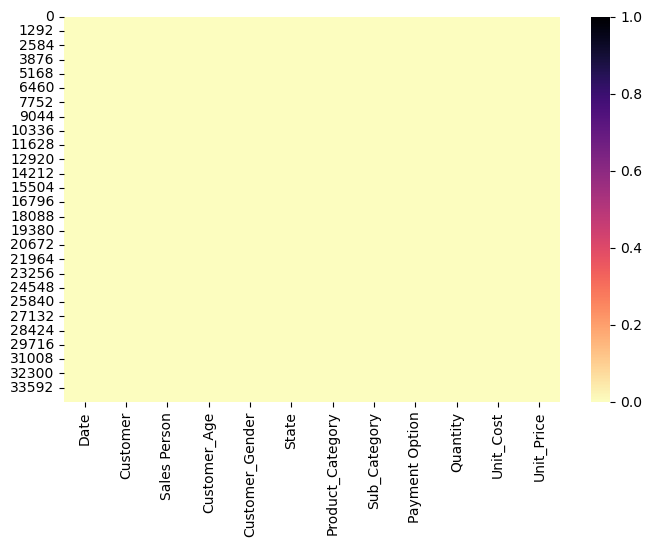

In [14]:
# Visualize the missing data
plt.figure(figsize= (8,5))
sns.heatmap(df.isnull(), cbar= True, cmap= 'magma_r');

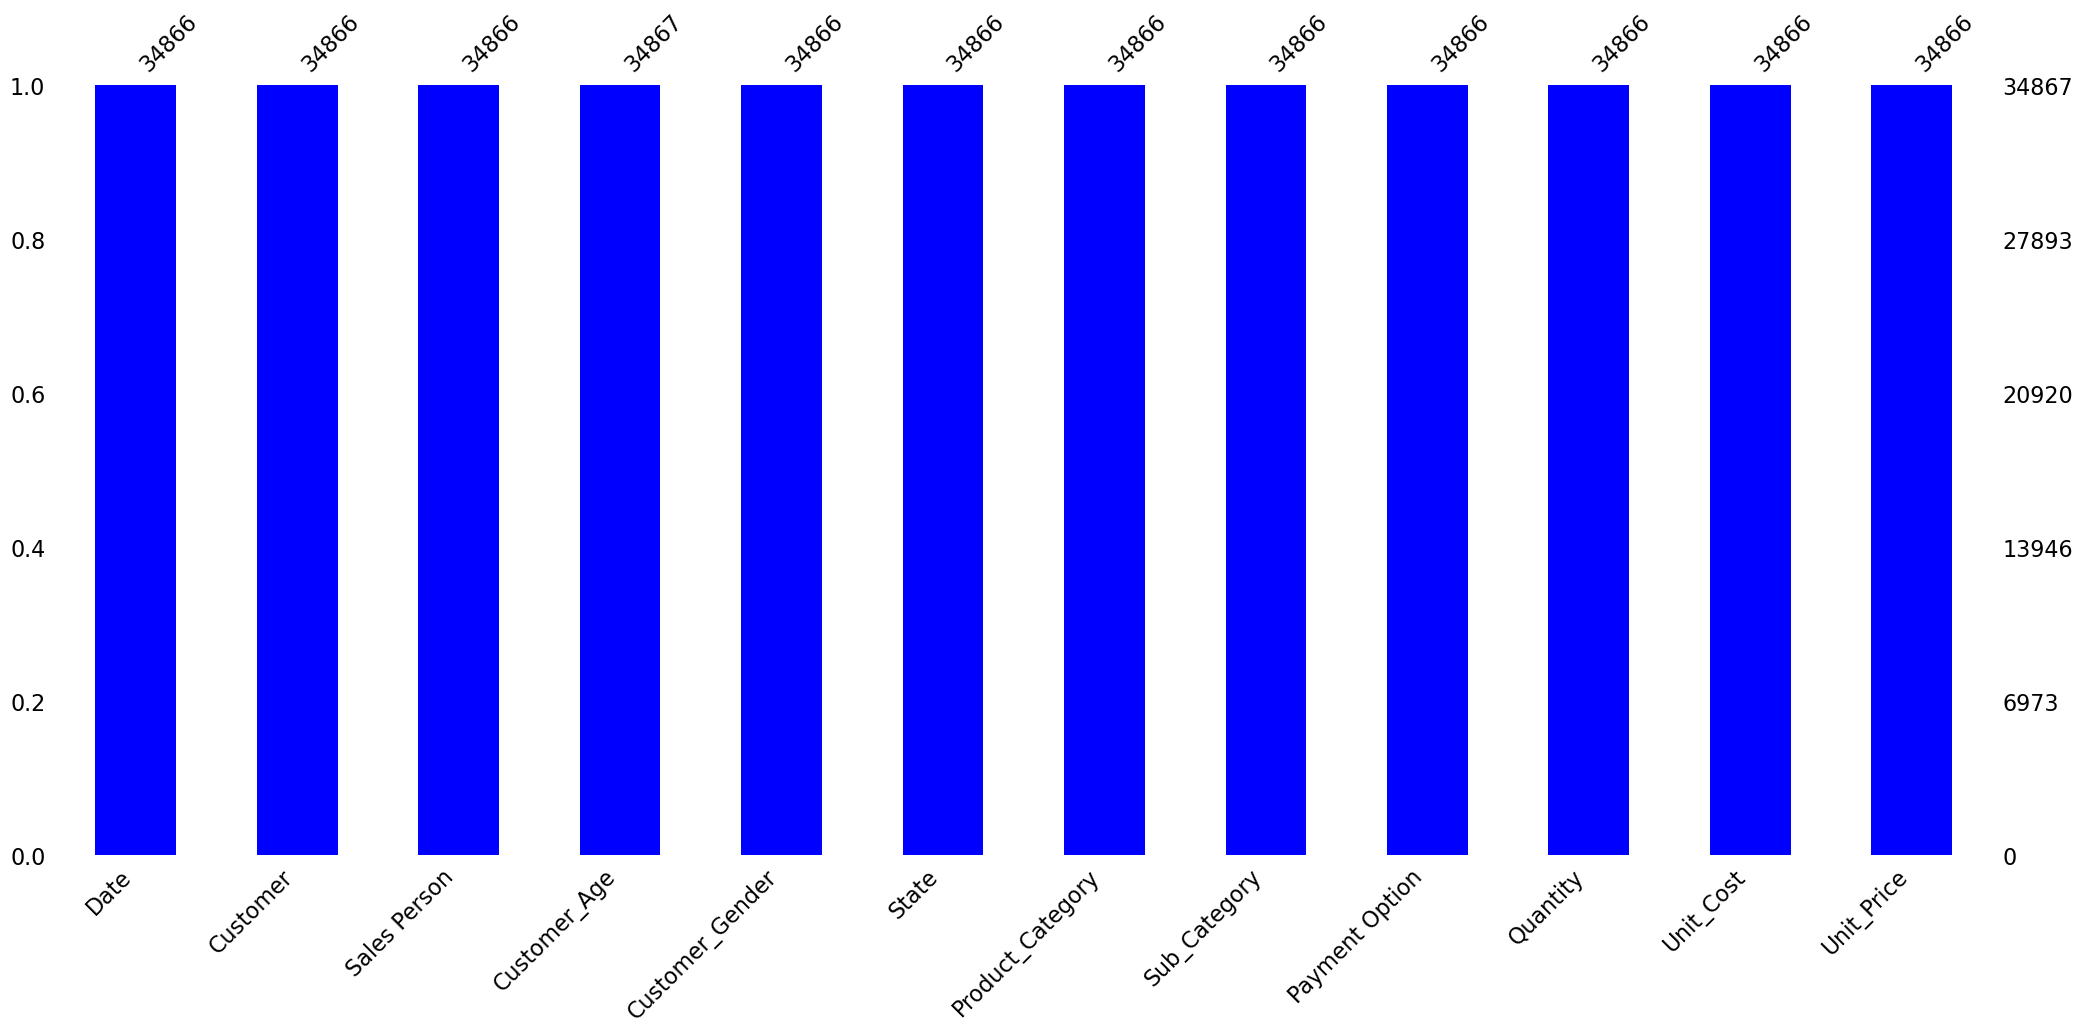

In [15]:
msno.bar(df, color='blue');

In [16]:
# Display where the missing data exist in the data (Rows with True is what you need)
df[df.isnull().any(axis=1)]

Date Customer Sales Person  Customer_Age Customer_Gender State  \
34866  NaN      NaN          NaN            38             NaN   NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34866         NaN

In [17]:
# Drop the missing data
df.dropna(inplace=True)

In [18]:
# To confirm it was dropped,
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [19]:
#Check for duplicates
df.duplicated().sum()

1

In [20]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

In [21]:
#Confirm duplicates were dropped
df.duplicated().sum()

0

In [22]:
# Datatime Analysis
df.head(2)

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0  19-Feb-16     High        Segun            29               F  Abia   
1  20-Feb-16     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0       80.0   
1         Clothing  Polo shirts         Online       2.0       24.5   

   Unit_Price  
0       109.0  
1        28.5

In [23]:
#Convert the Date column into a pandas datetime object
df['Date'] = pd.to_datetime(df['Date'])

df.info()

#Extract the year, month, quarter
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['month_name'] = df['Date'].dt.month_name()
df['quarter'] = df['Date'].dt.quarter

df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34865 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34865 non-null  datetime64[ns]
 1   Customer          34865 non-null  object        
 2   Sales Person      34865 non-null  object        
 3   Customer_Age      34865 non-null  int64         
 4   Customer_Gender   34865 non-null  object        
 5   State             34865 non-null  object        
 6   Product_Category  34865 non-null  object        
 7   Sub_Category      34865 non-null  object        
 8   Payment Option    34865 non-null  object        
 9   Quantity          34865 non-null  float64       
 10  Unit_Cost         34865 non-null  float64       
 11  Unit_Price        34865 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0       80.0   
1         Clothing  Polo shirts         Online       2.0       24.5   

   Unit_Price  year  month month_name  quarter  
0       109.0  2016      2   February        1  
1        28.5  2016      2   February        1

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date']

0       2016-02-19
1       2016-02-20
2       2016-02-27
3       2016-03-12
4       2016-03-12
           ...    
34861   2015-03-22
34862   2016-02-07
34863   2015-03-13
34864   2015-04-05
34865   2015-08-30
Name: Date, Length: 34865, dtype: datetime64[ns]

In [25]:
# Group Customer Age
#Creating a function
def age_group(x):
    if x <= 25:
        return '<=25 Young Adult'
    elif x <= 40:
        return '25-40 Adult'
    elif x <= 50:
        return '41-50 Old Adult'
    else:
        return '>=51 Elders'
    
#Apply function to the data
df['age_group'] = df['Customer_Age'].apply(age_group)
df.head(2)

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0       80.0   
1         Clothing  Polo shirts         Online       2.0       24.5   

   Unit_Price  year  month month_name  quarter    age_group  
0       109.0  2016      2   February        1  25-40 Adult  
1        28.5  2016      2   February        1  25-40 Adult

In [26]:
# Cost, Revenue, Profit calculations
df['Cost'] = df['Unit_Cost'] * df['Quantity']
df['Revenue'] = df['Unit_Price'] * df['Quantity']
df['Profit'] = df['Revenue'] - df['Cost']

df.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  year  month month_name  quarter    age_group    Cost  Revenue  \
0      109.00  2016      2   February        1  25-40 Adult   80.00   109.00   
1       28.50  2016      2   February        1  25-40 Adult   49.00    57.00   
2        5.00  2016      2   February        1  25-40 Adult   11.01    15.00   
3      116.50  2016      3      March        1  25-40 Adult  175.00   233.00   
4       41.67  2016      3      March        1  25-40 Adult  105.00   125.01   

   Profit  
0   29.00  
1    8.00  
2    3.99  
3   58.00  
4   20.01

In [27]:
#Profit/Loss grouping
def PorL (x):
    if x >=0:
        return 'Profit'
    else:
        return 'Loss'
df['Profit_or_Loss_Label'] = df['Profit']. apply(PorL)
df.head()
        

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
0      Accessories     Keyboard         Online       1.0  ...      109.00   
1         Clothing  Polo shirts         Online       2.0  ...       28.50   
2      Accessories     Keyboard         Online       3.0  ...        5.00   
3      Accessories     Keyboard         Online       2.0  ...      116.50   
4      Accessories     Keyboard         Online       3.0  ...       41.67   

   year  month  month_name quarter    age_group    Cost  Revenue  Profit  \
0  2016      2    February       1  25-40 Adult   80.00   109.00   29.00   
1  2016      2    February       1  25-40 Adult   49.00    57.00    8.00   
2  2016      2    February       1  25-40 Adult   11.01    15.00    3.99   
3  2016      3       March       1  25-40 Adult  175.00   233.00   58.00   
4  2016      3       March       1  25-40 Adult  105.00   125.01   20.01   

   Profit_or_Loss_Label  
0                Profit  
1                Profit  
2                Profit  
3                Profit  
4                Profit  

[5 rows x 21 columns]

***Univariate Analysis***

Involves analysing the distribution and summary statistics of individual variables/Column/feature.

- Numerical Column/Feature= Numerical Visulaization Techniques
- Categorical Column/Feature = Categorical Visulaization Techniques


##### Categorical Data Visualization

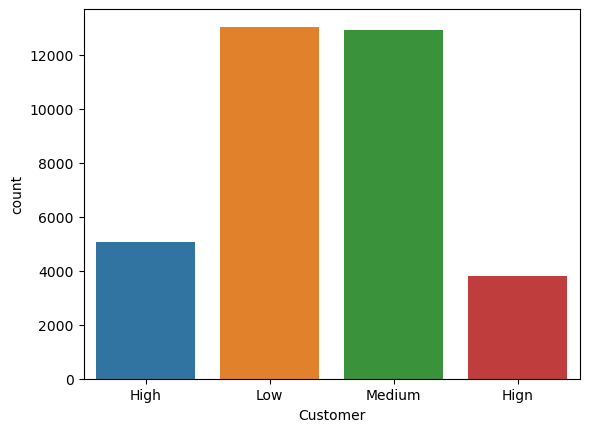

In [28]:
# How customers belong to each customer spec
sns.countplot(x='Customer', data= df);

In [29]:
# Investigate the columns affected
df[df['Customer'] == 'Hign'].head(3)

Date Customer Sales Person  Customer_Age Customer_Gender  State  \
29770 2015-08-03     Hign       Derick            28               F  Lagos   
29771 2015-08-04     Hign       Derick            28               F  Lagos   
29772 2015-08-04     Hign       Derick            28               F  Lagos   

      Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
29770           Phones       IPhone           Cash       1.0  ...     2136.00   
29771      Accessories     Keyboard           Cash       2.0  ...       19.50   
29772      Accessories     Keyboard           Cash       3.0  ...       18.67   

       year  month  month_name quarter    age_group     Cost  Revenue  Profit  \
29770  2015      8      August       3  25-40 Adult  2295.00  2136.00  -159.0   
29771  2015      8      August       3  25-40 Adult    35.00    39.00     4.0   
29772  2015      8      August       3  25-40 Adult    50.01    56.01     6.0   

       Profit_or_Loss_Label  
29770                  Loss  
29771                Profit  
29772                Profit  

[3 rows x 21 columns]

In [30]:
#Correct the Spelling of HIGN
df.loc[df['Customer'] == 'Hign', 'Customer'] = 'High'
df.head(2)

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
0      Accessories     Keyboard         Online       1.0  ...       109.0   
1         Clothing  Polo shirts         Online       2.0  ...        28.5   

   year  month  month_name quarter    age_group  Cost  Revenue  Profit  \
0  2016      2    February       1  25-40 Adult  80.0    109.0    29.0   
1  2016      2    February       1  25-40 Adult  49.0     57.0     8.0   

   Profit_or_Loss_Label  
0                Profit  
1                Profit  

[2 rows x 21 columns]

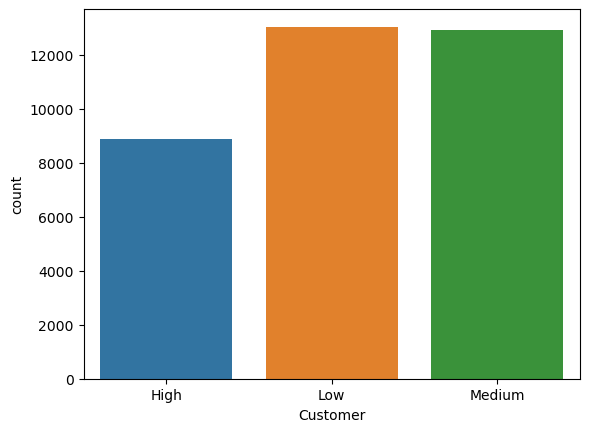

In [31]:
sns.countplot(x= 'Customer', data= df);

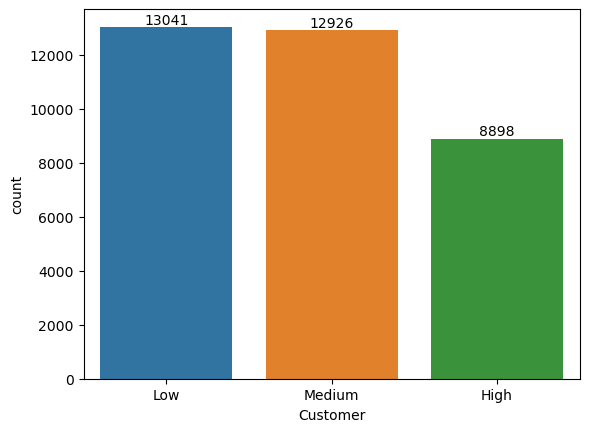

In [32]:
ax = sns.countplot(x=df['Customer'], order=df['Customer'].value_counts(ascending=False).index)
ax;
values = df['Customer'].value_counts(ascending= False).values
ax.bar_label(container= ax.containers[0], labels=values);

###### Narration about your Observations

- Looking at the bar plot, I observed that majority of the customers fall within the range of low group.

In [33]:
df['Customer'].value_counts()

Low       13041
Medium    12926
High       8898
Name: Customer, dtype: int64

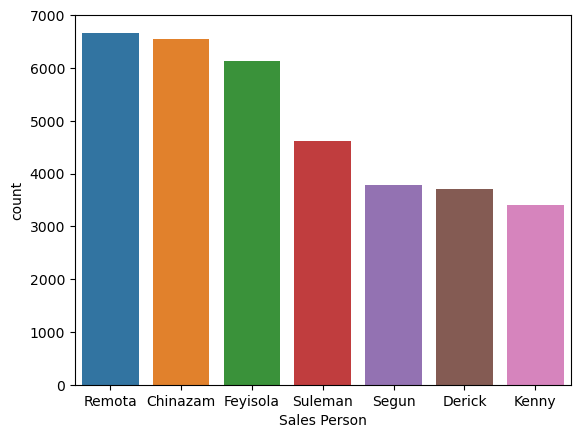

In [34]:
# Sales Person - How many transaction by sales person
ax = sns.countplot(x=df['Sales Person'], order=df['Sales Person'].value_counts(ascending=False).index)
ax;

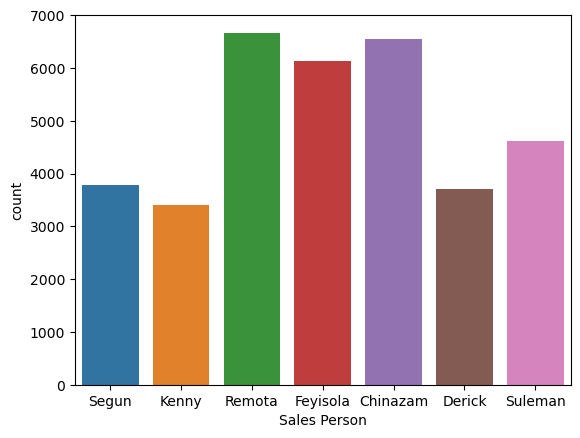

In [35]:
sns.countplot(x= 'Sales Person', data= df);

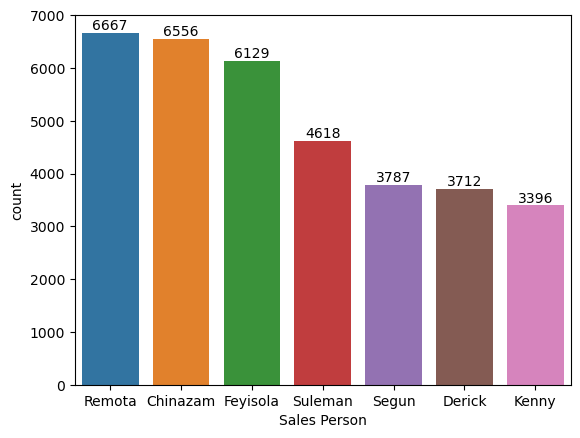

In [36]:
ax = sns.countplot(x= df['Sales Person'], data= df, order=df['Sales Person'].value_counts(ascending=False).index)
values = df['Sales Person'].value_counts(ascending= False).values
ax.bar_label(container= ax.containers[0], labels=values);

###### Narration about your Observations

- Remota has the most transactions completed and Kenny has the least.

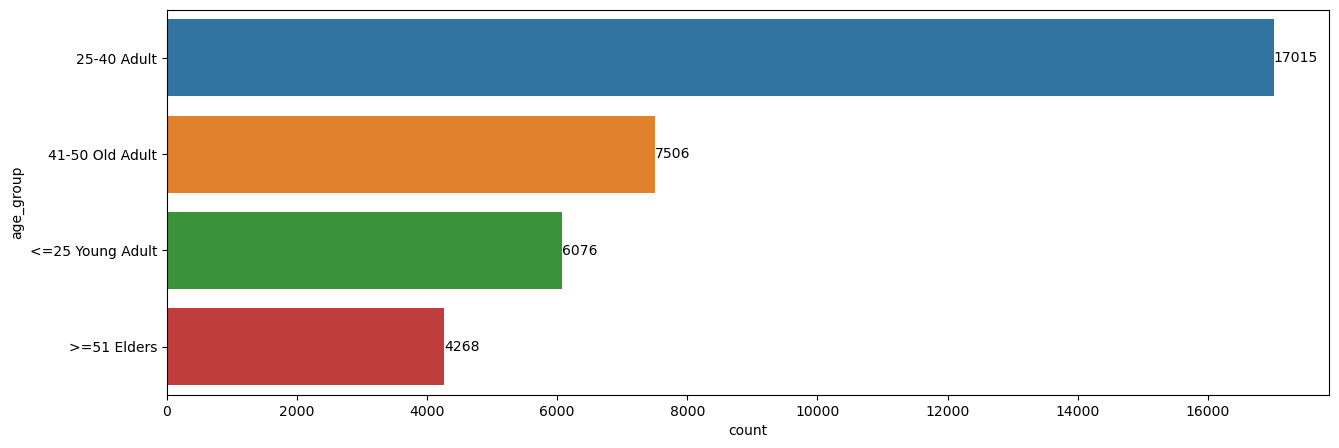

In [37]:
#Total transactions by customer Age Group
#to increase the size of the graph
plt.figure(figsize= (15,5))

ax = sns.countplot(y= df['age_group'], data= df, order=df['age_group'].value_counts(ascending=False).index)
values = df['age_group'].value_counts(ascending= False).values
ax.bar_label(container= ax.containers[0], labels=values);

###### Narration about your Observations

- Majority of the transaction are coming from the Adult between the ages of 25-40.

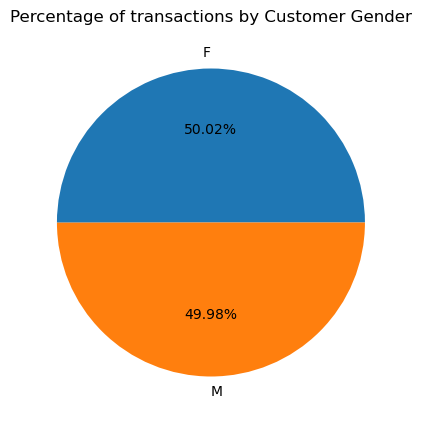

In [38]:
# Total transaction by Customer Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Customer_Gender'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Customer Gender")
plt.show;

##### Narration about your Observations

- Majority of the transactions are coming from the Female.

Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: State, dtype: int64


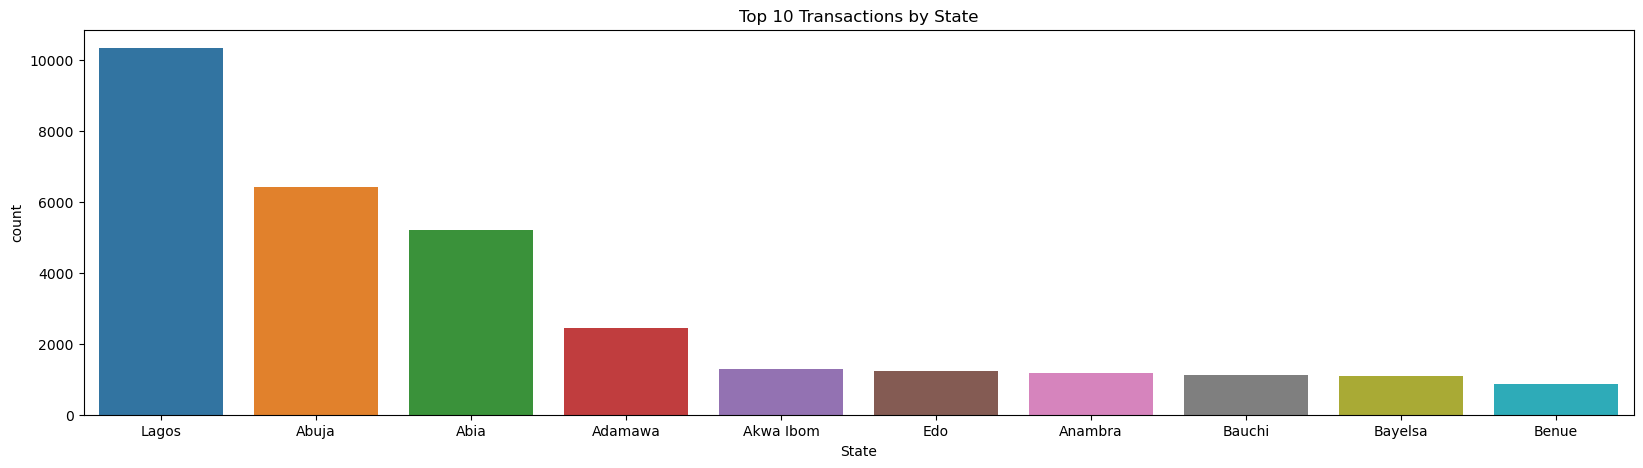

In [39]:
# Total 10 transaction by State
plt.figure(figsize=(20,5))

topten = df['State'].value_counts().head(10)
sns.countplot(x= 'State', data=df, order=topten.index)
plt.title('Top 10 Transactions by State')
print(topten);

##### Narration about your Observations

- Majority of the transaction are coming from Lagos followed by Abuja, then Abia.

In [40]:
# Product Category
df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Phones'], dtype=object)

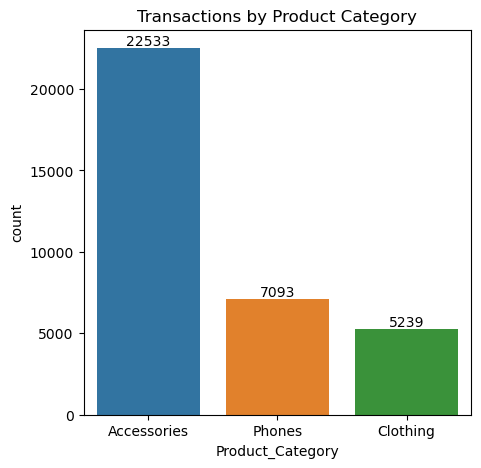

In [41]:
plt.figure(figsize= (5,5))

ax = sns.countplot(x= df['Product_Category'], data= df, order=df['Product_Category'].value_counts(ascending=False).index)
values = df['Product_Category'].value_counts(ascending= False).values
ax.bar_label(container= ax.containers[0], labels=values)
plt.title('Transactions by Product Category');

##### Narration about your Observations

- More accessories were purchased followed by Phones and then clothing.

In [42]:
#Sub Category
df['Sub_Category'].unique()

array(['Keyboard', 'Polo shirts', 'Wrist Watch', 'Laptop Charger',
       'IPhone', 'Mouse', 'Jerseys', 'Screen Guard', 'Memory Card',
       'Socks', 'Tshirts', 'Infinix', 'Ear Piece', 'Vests', 'Samsung',
       'Phone Charger', 'Shorts'], dtype=object)

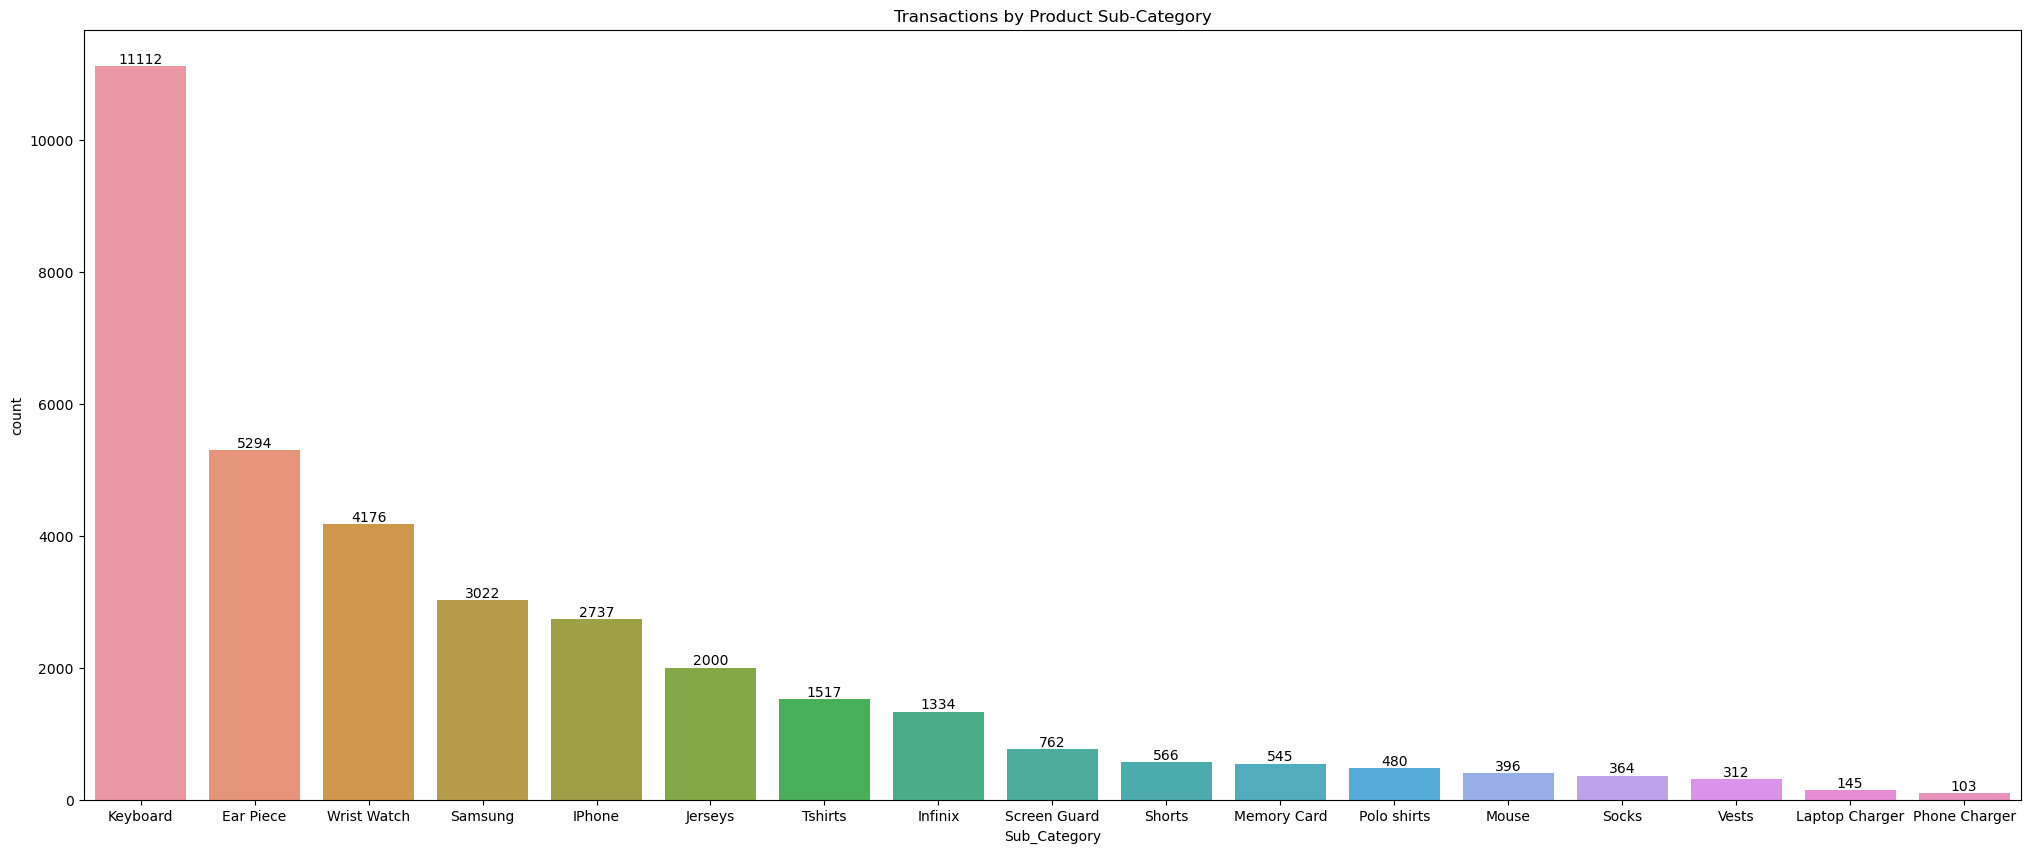

In [43]:
plt.figure(figsize= (25,10))

ax = sns.countplot(x= df['Sub_Category'], data= df, order=df['Sub_Category'].value_counts(ascending=False).index)
values = df['Sub_Category'].value_counts(ascending= False).values
ax.bar_label(container= ax.containers[0], labels=values)
plt.title('Transactions by Product Sub-Category');

In [44]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit',
       'Profit_or_Loss_Label'],
      dtype='object')

In [45]:
#Payment Option
df['Payment Option'].unique()

array(['Online', 'Cash', 'POS'], dtype=object)

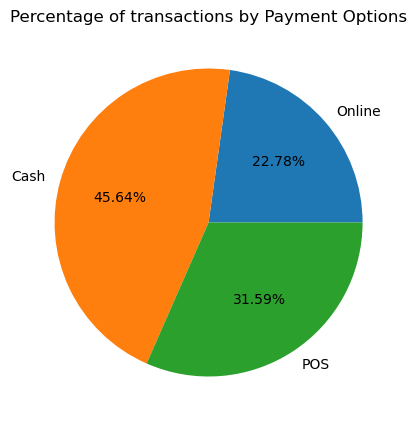

In [46]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Payment Option'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Payment Options")
plt.show();

In [47]:
#Month Name
df['month_name'].unique()

array(['February', 'March', 'April', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'May', 'January'],
      dtype=object)

June         3680
May          3676
December     3414
April        3283
March        3155
January      2907
February     2887
October      2554
November     2488
August       2303
September    2303
July         2215
Name: month_name, dtype: int64


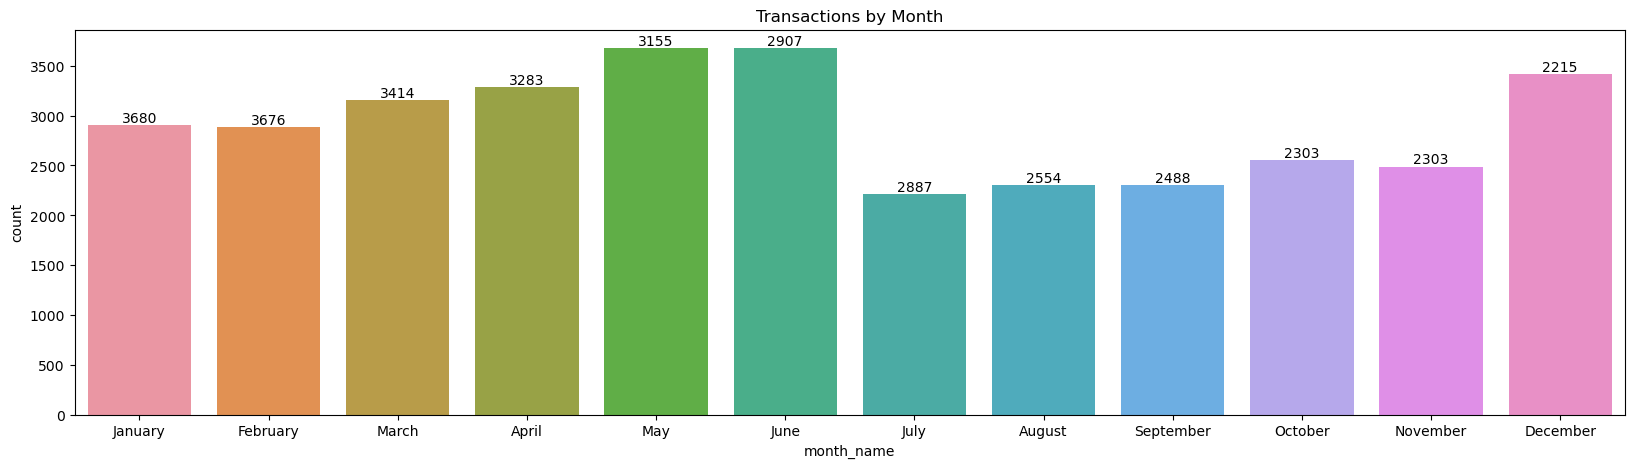

In [48]:
#Transactions by Month.
plt.figure(figsize=(20,5))

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

ax= sns.countplot(x='month_name', data=df, order=month_order)
plt.title('Transactions by Month')

values = df['month_name'].value_counts().head(12)
ax.bar_label(container= ax.containers[0], labels=values)
print (values);

##### Narration about your Observations

- The highest transactions occured in June, followed by May, then December. The least occured in July.

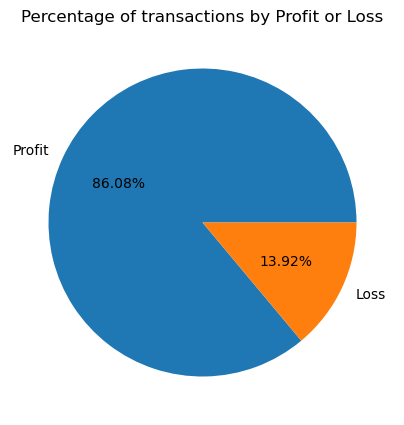

In [49]:
# Total transaction by Profit or Loss

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Profit_or_Loss_Label'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of transactions by Profit or Loss")
plt.show();

##### Narration about your Observations

- 86.08% of the transactions yielded into Profit while 13.92% yielded into Loss.

**** Numerical Data Visualization ***

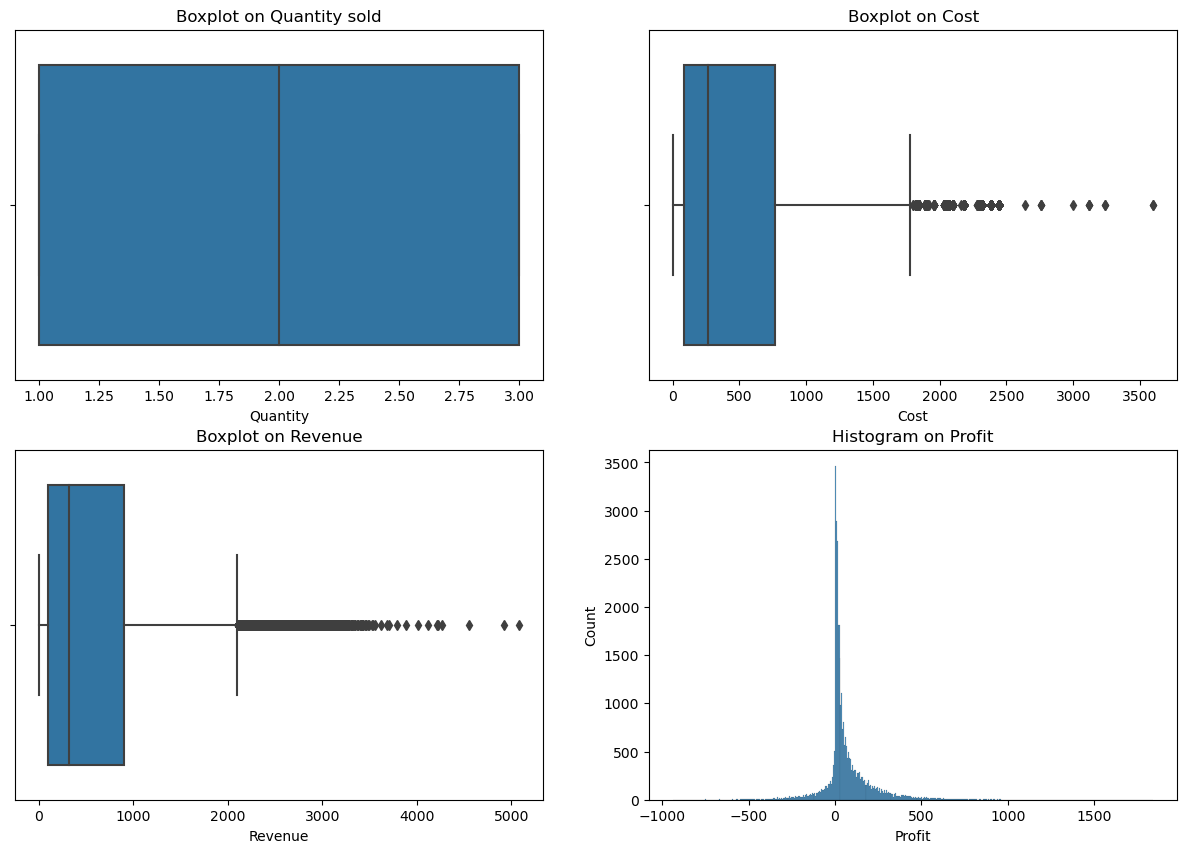

In [50]:
# Quantity, Cost, Revenue and Profit - Subplot (Boxplot, scatterplot, histogram)

fig, axs= plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot( x= 'Quantity', y=None, hue=None, data=df, ax=axs[0,0])
axs[0,0].set_title('Boxplot on Quantity sold')

sns.boxplot( x= 'Cost', y=None, hue=None, data=df, ax=axs[0,1])
axs[0,1].set_title('Boxplot on Cost')

sns.boxplot( x= 'Revenue', y=None, hue=None, data=df, ax=axs[1,0])
axs[1,0].set_title('Boxplot on Revenue')

sns.histplot( x= 'Profit', y=None, hue=None, data=df, ax=axs[1,1])
axs[1,1].set_title('Histogram on Profit');

##### Narration about your Observations

- The boxplot shows the distribution of the quantity sold in the data. From the boxplot, we can see that the median quantity sold is around 2.0. There are no outliers in the data.
- The boxplot shows the distribution of the cost price in the data. From the boxplot, we can see that the median cost price is  261. There are some outliers in the data, which indicates that there might be some extremely high cost.
- Based on the Revenue boxplot, it appears that there are several outliers in the upper range of the revenue values, suggesting that there may be a few transactions that generated a significantly higher revenue than the rest. The median revenue value appears to be around 318. Overall, the plot suggests that there is some variation in the revenue generated by transactions in the dataset, with a few transactions generating significantly higher revenue than the rest.
- The histogram plot of Profit shows the distribution of profit in the dataset. From the plot, it can be observed that there are some losses and also some profits. The majority of the profits fall between -500 and 1,000. Additionally, there seems to be some outliers on the right side of the plot, indicating that there are more profits than losses in the dataset. However, the plot does not show any information about the frequency or counts of the profits, so it is difficult to draw precise conclusions without additional information.

In [51]:
df['Cost'].median()

261.0

In [52]:
df['Revenue'].median()

318.99

**Bivariate Analysis**

Bivariate analysis involves analyzing the relationship between two variables.

- Focus on Profit

In [53]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit',
       'Profit_or_Loss_Label'],
      dtype='object')

''

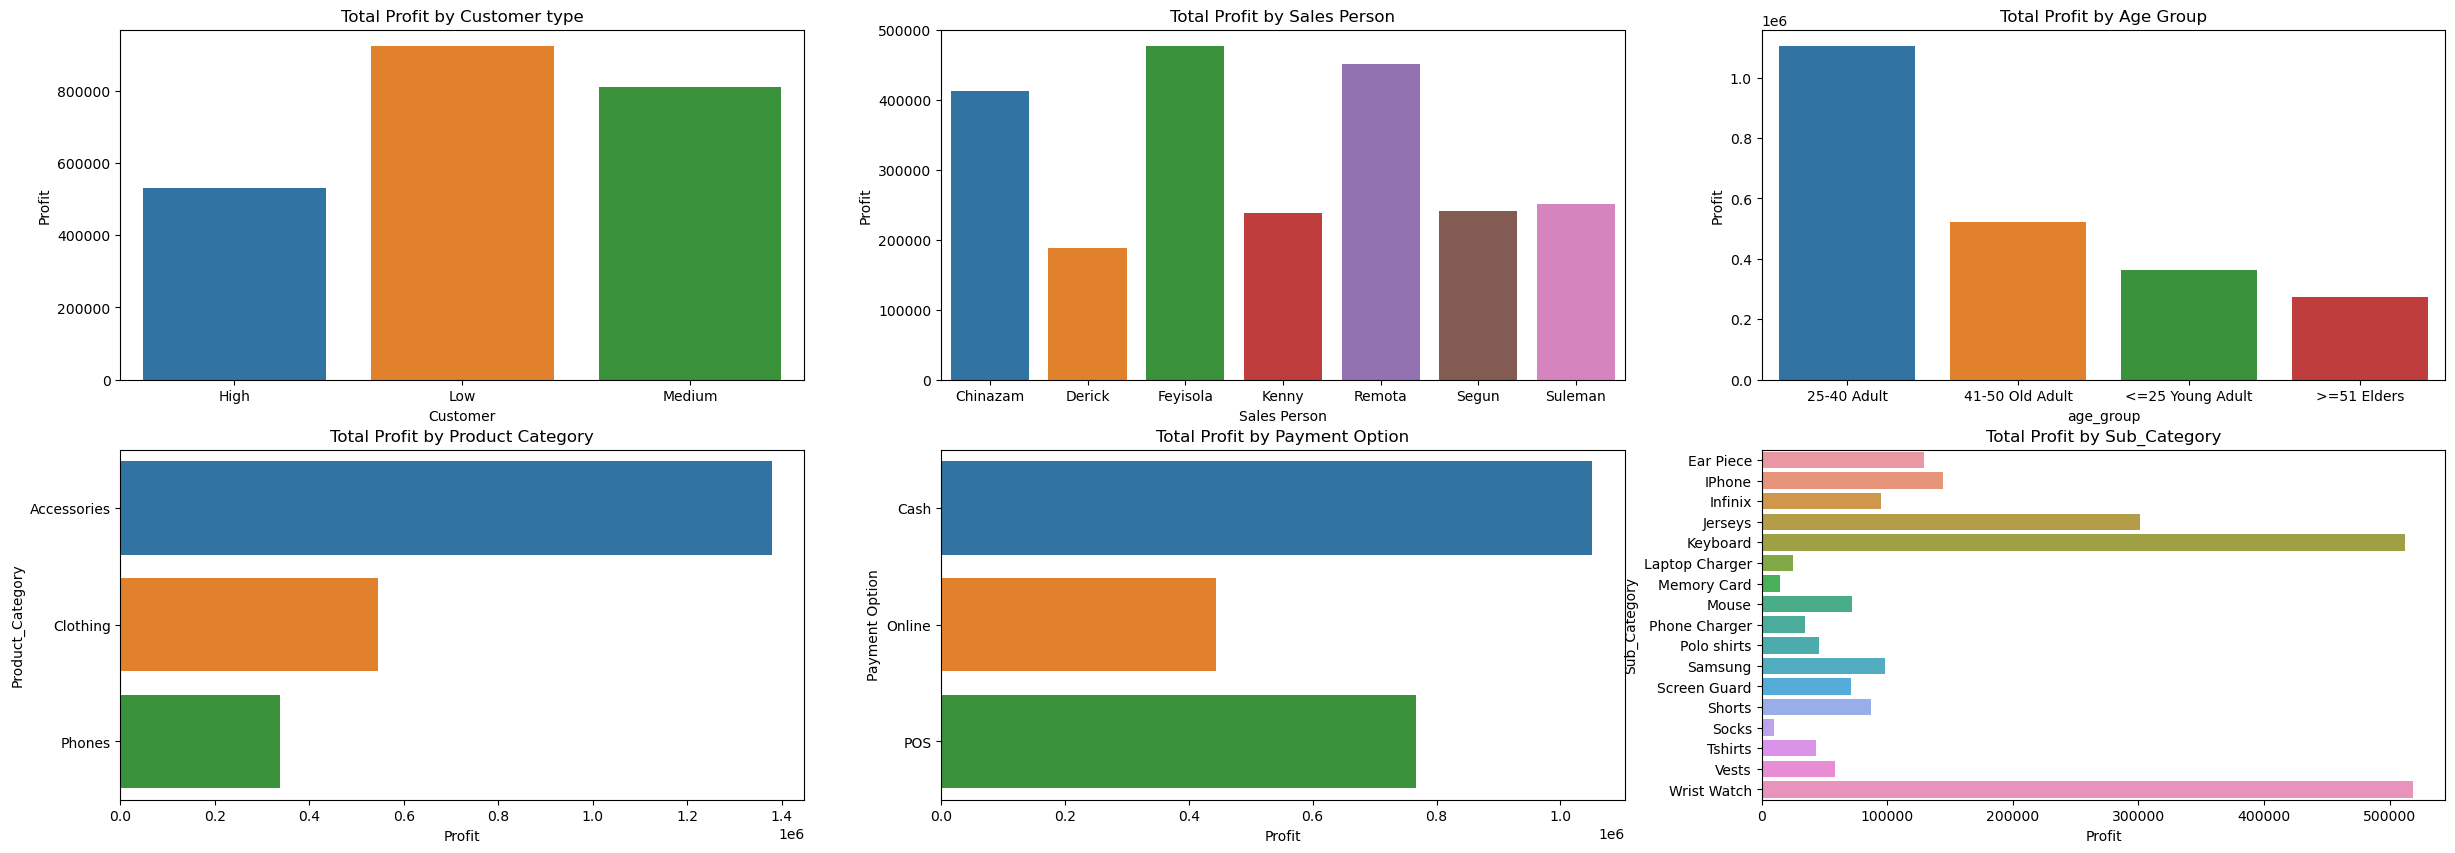

In [54]:
#Categorical Columns

fig, axs= plt.subplots(nrows=2, ncols=3, figsize=(30,10))

cust_prof =df.groupby('Customer')['Profit'].sum().reset_index()
sns.barplot(x='Customer', data= cust_prof, y= 'Profit', ax=axs[0,0])
axs[0,0].set_title('Total Profit by Customer type')

sp_prof =df.groupby('Sales Person')['Profit'].sum().reset_index()
sns.barplot(x='Sales Person', data= sp_prof, y= 'Profit', ax=axs[0,1])
axs[0,1].set_title('Total Profit by Sales Person')

ag_prof =df.groupby('age_group')['Profit'].sum().reset_index()
sns.barplot(x='age_group', data= ag_prof, y= 'Profit', ax=axs[0,2])
axs[0,2].set_title('Total Profit by Age Group')

pc_prof =df.groupby('Product_Category')['Profit'].sum().reset_index()
sns.barplot(y='Product_Category', data= pc_prof, x= 'Profit', ax=axs[1,0])
axs[1,0].set_title('Total Profit by Product Category')

po_prof =df.groupby('Payment Option')['Profit'].sum().reset_index()
sns.barplot(y='Payment Option', data= po_prof,x= 'Profit', ax=axs[1,1])
axs[1,1].set_title('Total Profit by Payment Option')

sc_prof =df.groupby('Sub_Category')['Profit'].sum().reset_index()
sns.barplot(y='Sub_Category', data= sc_prof, x= 'Profit', ax=axs[1,2])
axs[1,2].set_title('Total Profit by Sub_Category')
;

##### Narration about your Observations

- .

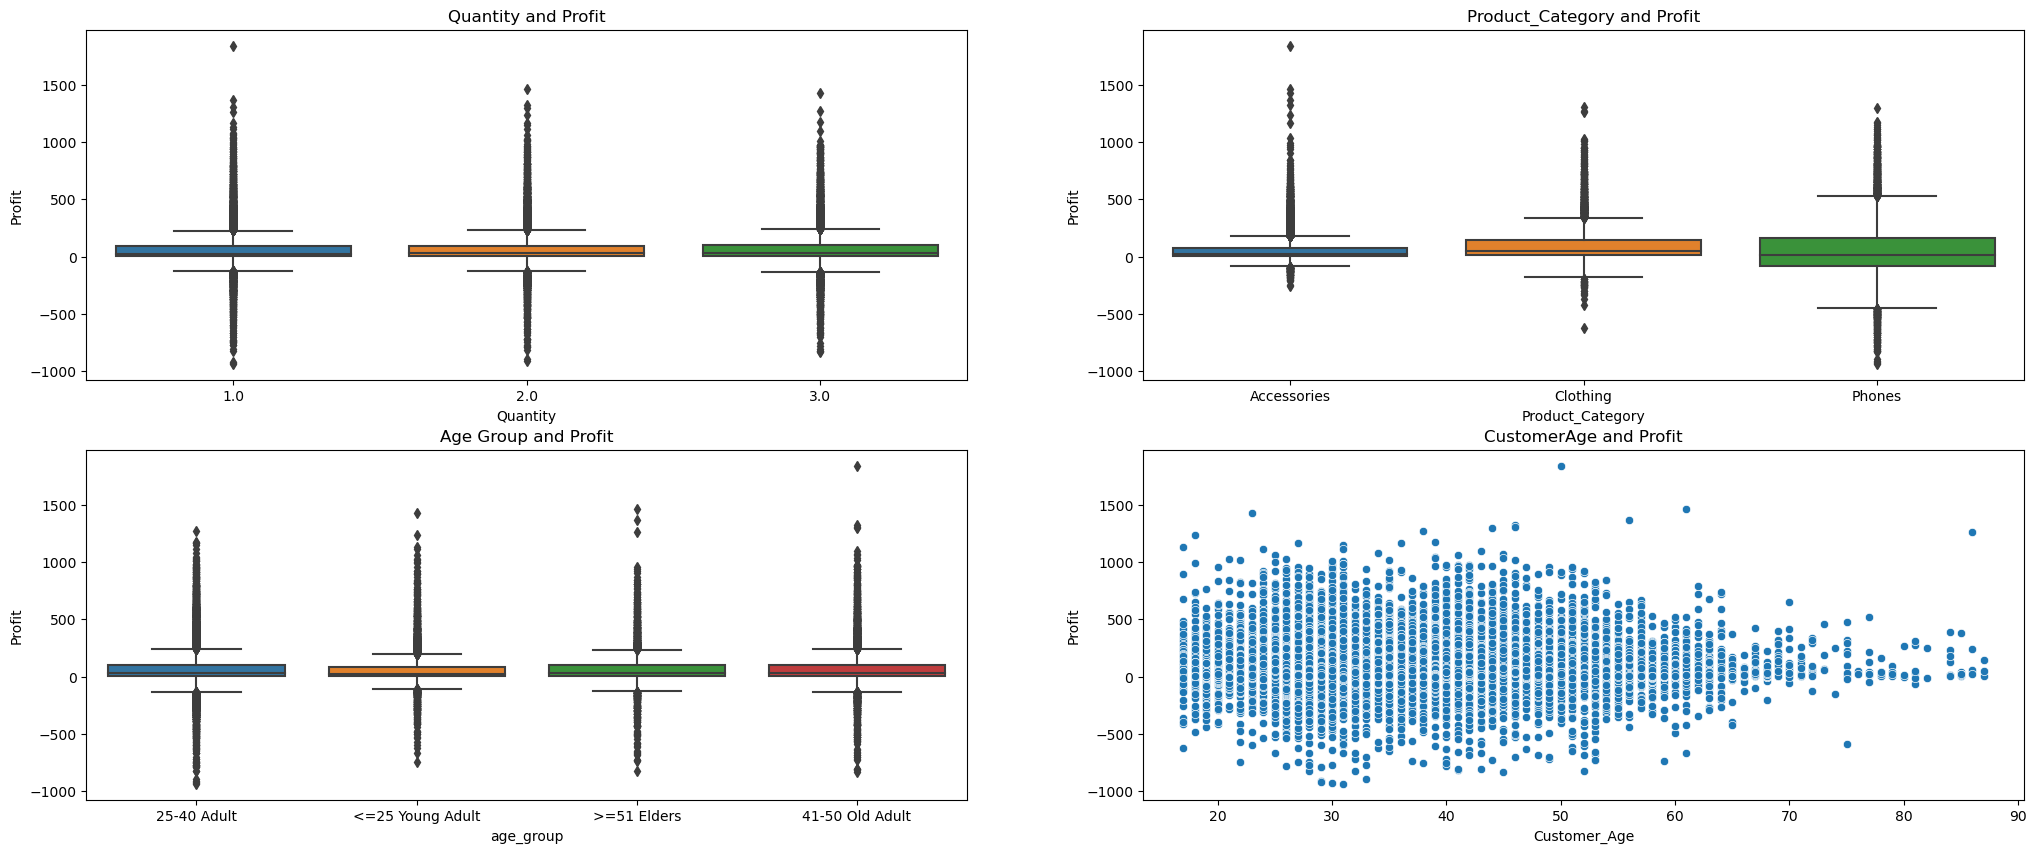

In [55]:
# Numerical Columns

fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(25,10))

sns.boxplot(x='Quantity', y='Profit', data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit");

sns.boxplot(x='Product_Category', y='Profit', data=df, ax=axs[0,1])
axs[0,1].set_title("Product_Category and Profit");

sns.boxplot(x='age_group', y='Profit', data=df, ax=axs[1,0])
axs[1,0].set_title("Age Group and Profit");

sns.scatterplot(x='Customer_Age', y='Profit', data=df, ax=axs[1,1])
axs[1,1].set_title("CustomerAge and Profit");

The first chart (boxplot on Quantity and Profit) shows that as the quantity increases, the profit also tends to increase. There are a few outliers in the high profit region, which might be due to some special factors or reasons.

The second chart (boxplot on Product_Category and Profit) shows that some product categories have higher profits compared to others. For example, product category "Accessories" has a higher median profit compared to other categories. However, there are some outliers in the low profit region, which might need to be investigated.

The third chart (boxplot on Age Group and Profit) shows that age group does not have a significant impact on the profit. All age groups have a similar distribution of profit, with a few outliers in the high profit region.

The fourth chart (scatterplot on CustomerAge and Profit) shows that there is no strong correlation between customer age and profit. The scatterplot is evenly distributed with no clear trend or pattern.

**Multivariate Analysis**

It involves analyzing the relationship between three or more variables

In [56]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'Cost', 'Revenue', 'Profit',
       'Profit_or_Loss_Label'],
      dtype='object')

In [57]:
# Product category against Cost, Revenue and Profit

procat= df.groupby('Product_Category')[['Cost', 'Revenue', 'Profit']].sum().reset_index()
procat1 = pd.melt(procat, id_vars= 'Product_Category', var_name= 'Metric', value_name= 'Total')

In [58]:
procat1

Product_Category   Metric        Total
0      Accessories     Cost   6041876.06
1         Clothing     Cost   2892324.94
2           Phones     Cost  11148745.02
3      Accessories  Revenue   7420635.12
4         Clothing  Revenue   3437556.95
5           Phones  Revenue  11486354.63
6      Accessories   Profit   1378759.06
7         Clothing   Profit    545232.01
8           Phones   Profit    337609.61

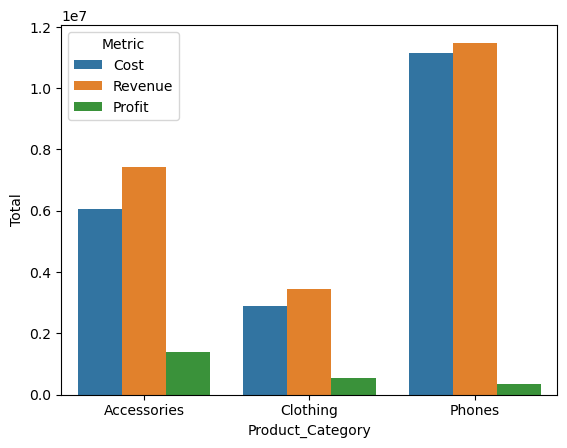

In [59]:
sns.barplot(data=procat1, x='Product_Category', y= 'Total', hue= 'Metric');

#### Narration about my observations

1 The largest profit made are from accessories.

2 Although, the highest cost and revenue were incurred on Phones, small profit are obtained from Phones.

3 The least cost was incurred on Clothing with a higher profit compared to Phones.

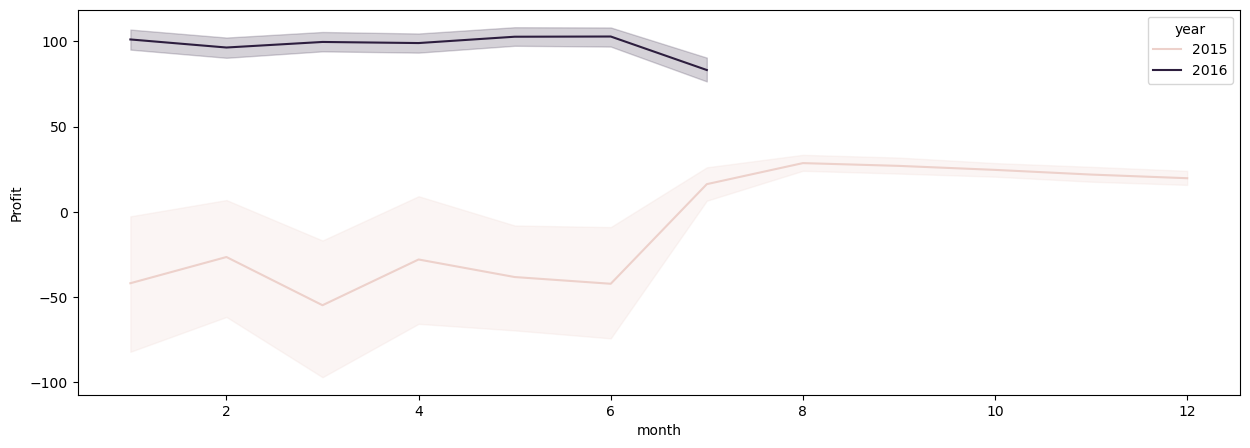

In [62]:
plt.figure(figsize= (15,5))
sns.lineplot(x='month', y='Profit', data=df, hue='year');

In [64]:
# Using pivot table
df.pivot_table(values= 'Profit', index= 'year', columns= 'month', aggfunc= 'sum')

month         1          2          3          4          5          6   \
year                                                                      
2015    -5778.70   -4079.65   -8163.79   -4945.69   -7801.45   -8690.61   
2016   280204.25  263640.18  299777.67  307746.51  356915.59  357549.86   

month         7         8         9         10       11        12  
year                                                               
2015    15104.47  65918.24  62172.33  62950.66  54480.9  67448.12  
2016   107151.79       NaN       NaN       NaN      NaN       NaN

### Narration about your observations

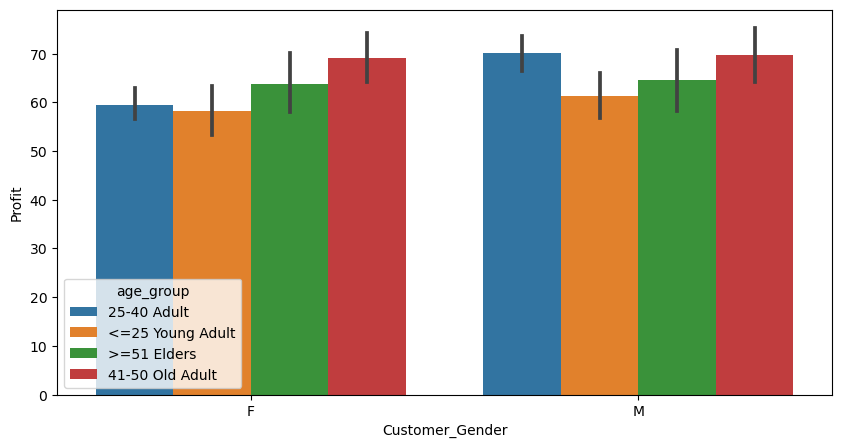

In [75]:
# Customer Gender, Age Group amd Profit
plt.figure(figsize= (10,5))
sns.barplot(x= 'Customer_Gender', y= 'Profit', data=df, hue= 'age_group');

In [69]:
# Using pivot table to view the valuse for the chart above
df.pivot_table(values= 'Profit', index= 'Customer_Gender', columns= 'age_group', aggfunc= 'sum')

age_group        25-40 Adult  41-50 Old Adult  <=25 Young Adult  >=51 Elders
Customer_Gender                                                             
F                  509089.54        261011.12         169959.46    140191.10
M                  593853.62        259447.64         194125.09    133923.11

In [70]:
# Correlation
a=df.corr()
a

Customer_Age  Quantity  Unit_Cost  Unit_Price      year  \
Customer_Age      1.000000  0.002801   0.025372    0.026312  0.052709   
Quantity          0.002801  1.000000  -0.312516   -0.324111  0.000918   
Unit_Cost         0.025372 -0.312516   1.000000    0.981032 -0.073270   
Unit_Price        0.026312 -0.324111   0.981032    1.000000 -0.022653   
year              0.052709  0.000918  -0.073270   -0.022653  1.000000   
month            -0.051619 -0.000925  -0.018375   -0.051439 -0.810664   
quarter          -0.051942 -0.000358  -0.024215   -0.057173 -0.812495   
Cost              0.026551  0.008295   0.854906    0.832966 -0.084595   
Revenue           0.027777  0.008418   0.836954    0.851031 -0.025389   
Profit            0.013921  0.003097   0.171570    0.338494  0.259743   

                 month   quarter      Cost   Revenue    Profit  
Customer_Age -0.051619 -0.051942  0.026551  0.027777  0.013921  
Quantity     -0.000925 -0.000358  0.008295  0.008418  0.003097  
Unit_Cost    -0.018375 -0.024215  0.854906  0.836954  0.171570  
Unit_Price   -0.051439 -0.057173  0.832966  0.851031  0.338494  
year         -0.810664 -0.812495 -0.084595 -0.025389  0.259743  
month         1.000000  0.971628 -0.019334 -0.058450 -0.194317  
quarter       0.971628  1.000000 -0.026178 -0.065212 -0.195985  
Cost         -0.019334 -0.026178  1.000000  0.979119  0.201254  
Revenue      -0.058450 -0.065212  0.979119  1.000000  0.396181  
Profit       -0.194317 -0.195985  0.201254  0.396181  1.000000

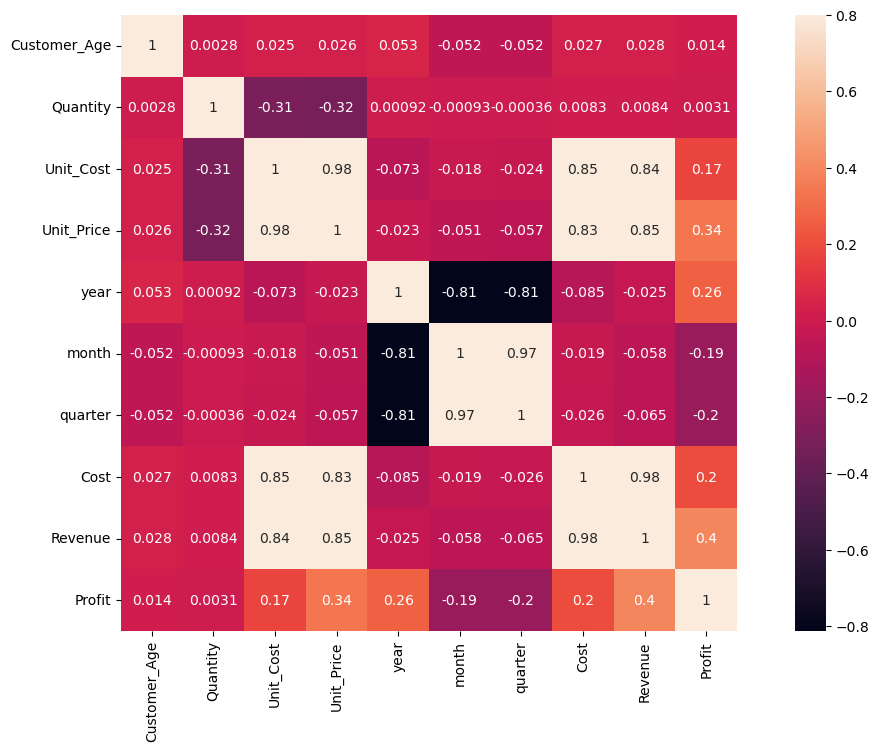

In [71]:
a=df.corr()
plt.figure(figsize= (15,8))
sns.heatmap(a, vmax=.8, square= True, annot= True);

### Narration about your observations
There is a high positive correlation between cost and revenue, unit price and unit cost.

C:\Users\EZ FARMING\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


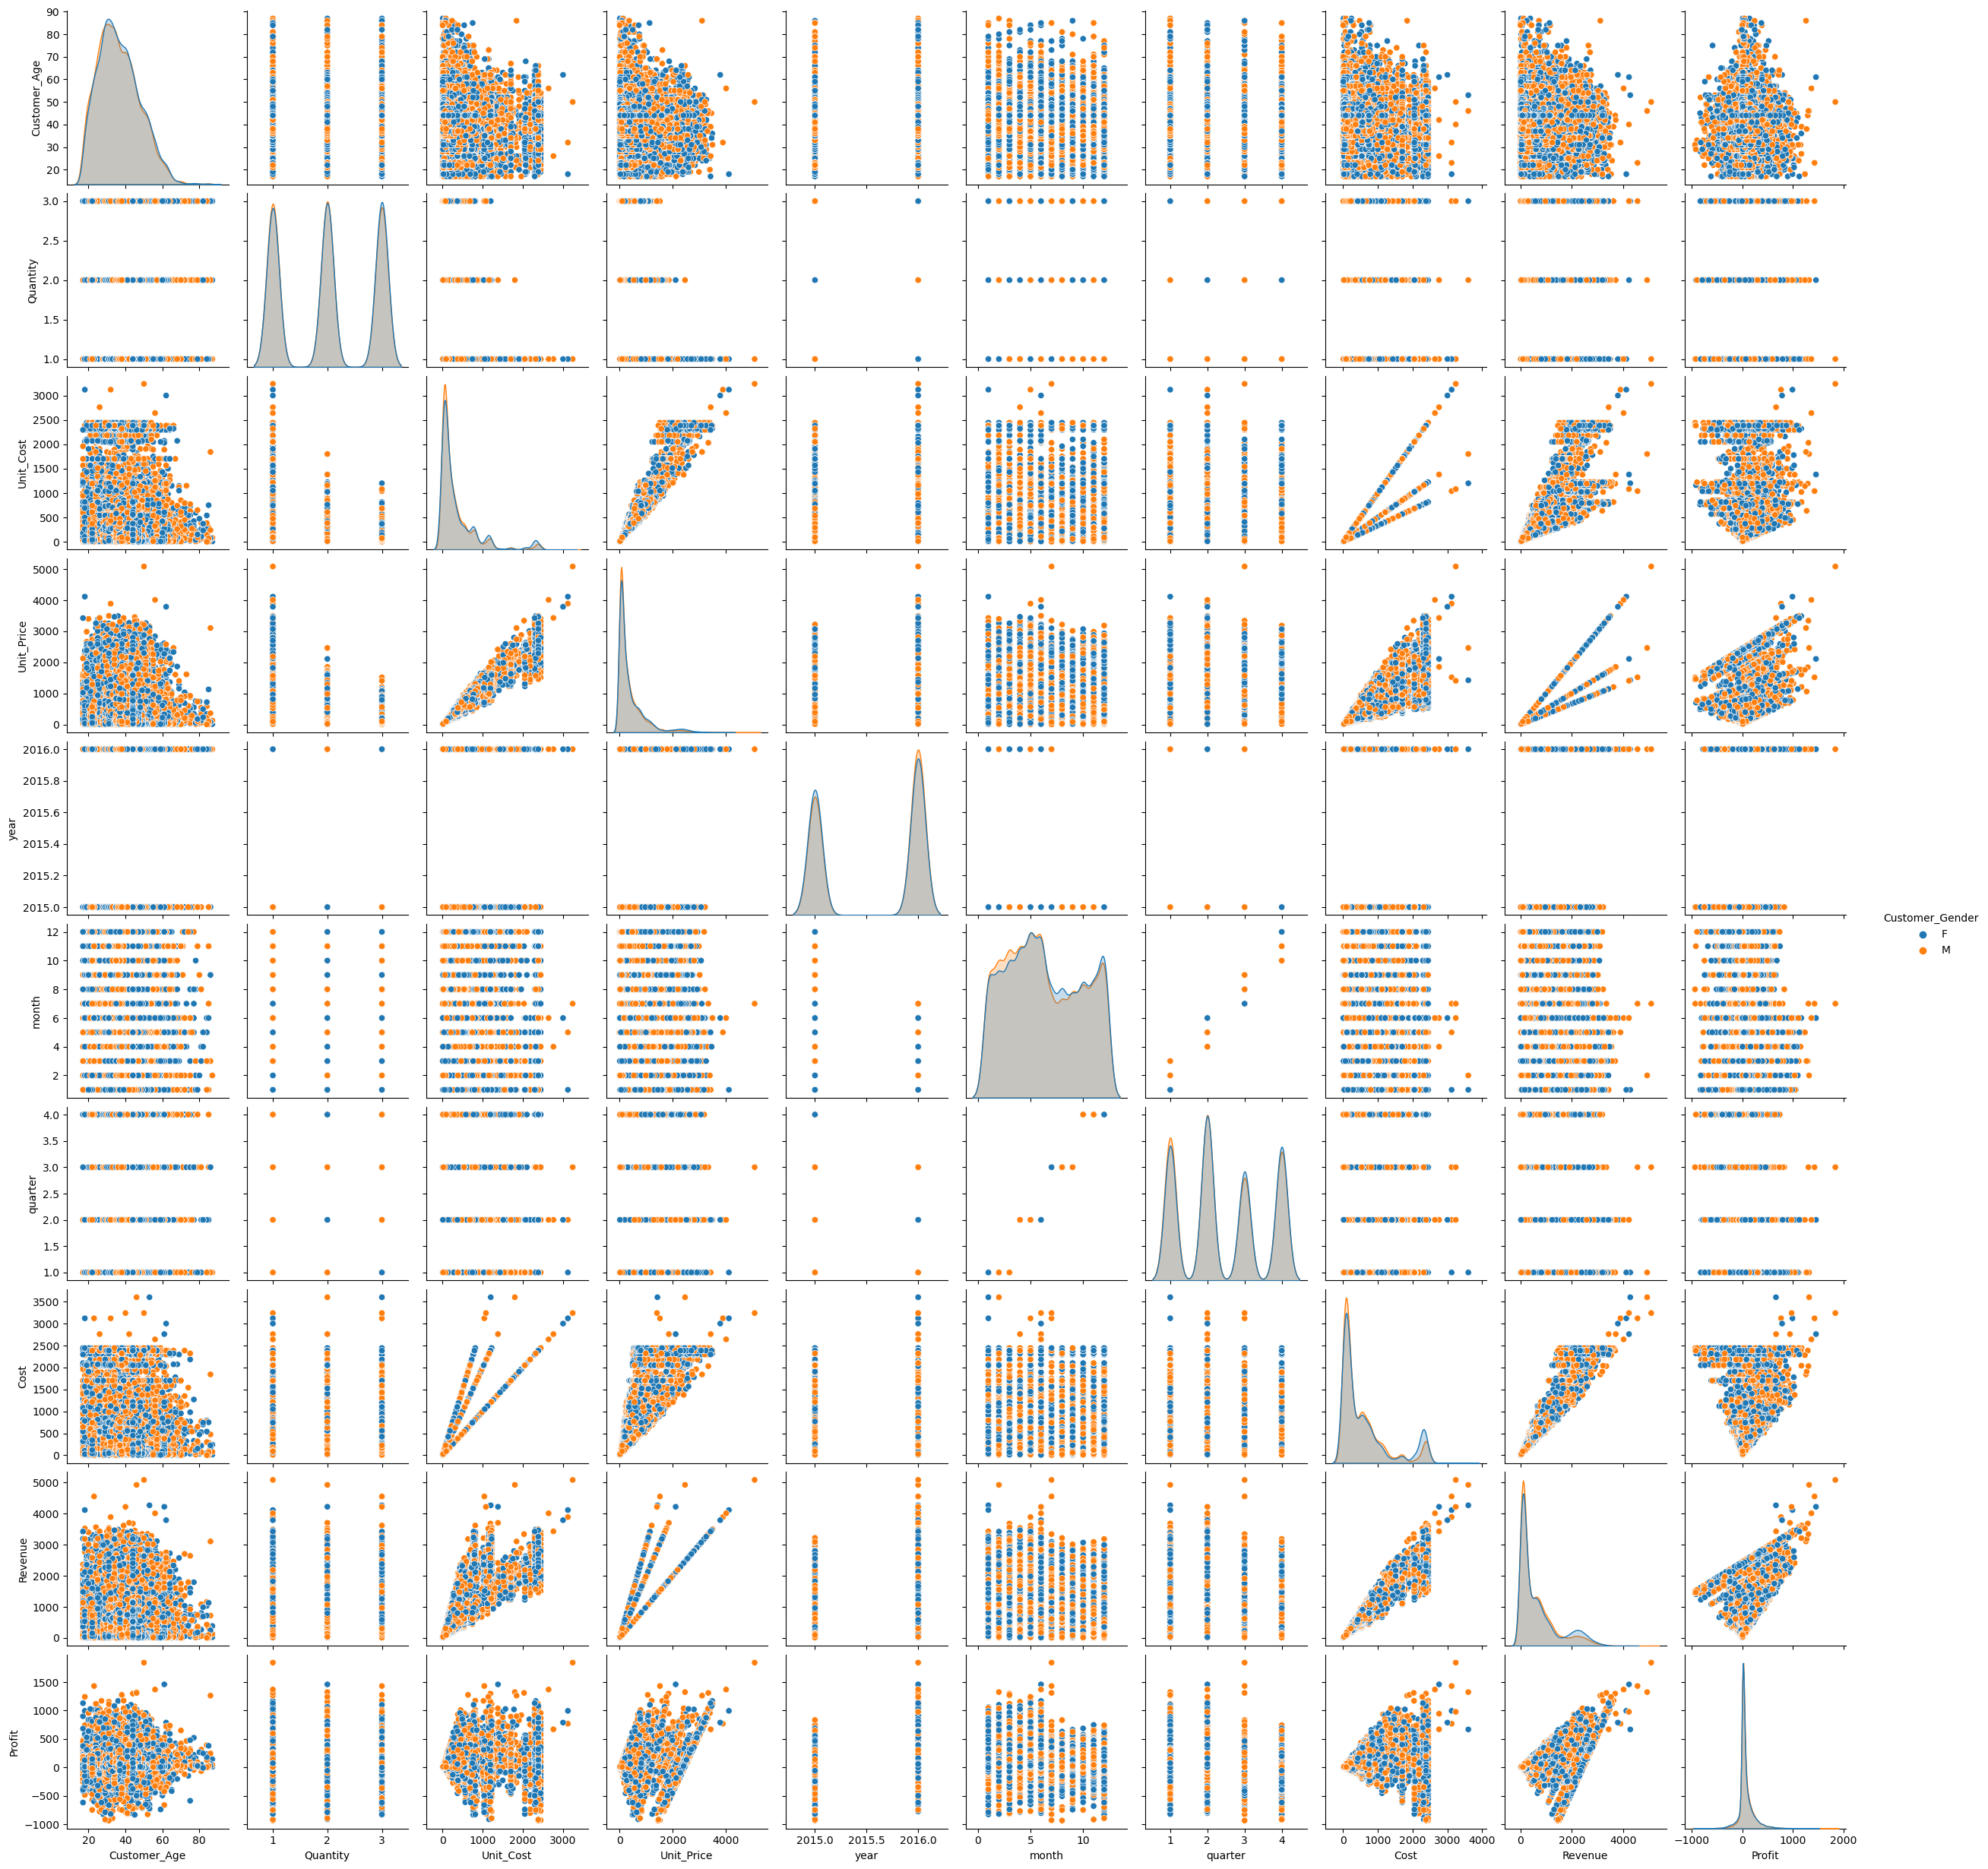

In [76]:
#Pairplot only looks a numerical columns
sns.pairplot(df, size= 2.5, hue= 'Customer_Gender');